# Homework 5

**Before you start:** Read Chapter on Naive Bayes and KNN in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

# Part 1: K-Nearst-Neighbors

### Problem 2 ##

The objective is to classify the breast cancer data using K-NN classifier.

**TODO1**

Load the breast cancer data and rename the columns to the below fields in the same order

Id, C_thickness, Cell_Size, Cell_Shape, Adhesion, E_Cell_Size, Bare_Nuclei, B_Chromatin, N_Nucleoli, Mitoses, Class

**TODO 2**

Plot the heatmap for the correlation coefficients with the target variable (Class)  and interpret your findings.


Drop redundant columns and view summary of the dataset.
Convert all the variables to numeric.


**TODO 3**



Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set.

Impute the missing values with the mean values of training data.
Check if all the nulls are removed in both train and test dataset.

Standardize the data.

**Note:**   When you standardize the validation set, you need to use the training set's mean and variance. 


**TODO 4**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

**TODO 5**

For the chosen k, display the confusion matrix and evaluate the performance of the model using recall and precision.

Check for overfitting and underfitting for the k chosen.

**TODO 6**

Classify the new record given below using the chosen k. 

1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1

Considering the size of the dataset, would you recommend data partition before scoring the new record? Why?

### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN regression to predict the mpg with the given attributes.

In [14]:
import pandas as pd
import numpy as np

In [15]:
# import the dataset "auto_mpg.csv"
df=pd.read_csv("auto_mpg.csv")

**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [17]:
print("Unique Count of the variable car name: ",len(df['car name'].unique()))
print("Length of the Dataset: ",len(df))

Unique Count of the variable car name:  301
Length of the Dataset:  393


Here, we can see that almost all the values are unique except a few. So, keeping this column does not serve any purpose to the model. So its better to drop the predictor variable help in reducing the complexity of the model.  

Using One Hot encoding will impart 301 additional columns and  label encoding this nominal variable will bias the model by adding weight to the value.

In [18]:
df.drop('car name', axis=1, inplace=True)

**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [19]:
df = pd.get_dummies(df, columns=["origin"])

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
388,27.0,4,140.0,86,2790,15.6,82,1,0,0
389,44.0,4,97.0,52,2130,24.6,82,0,1,0
390,32.0,4,135.0,84,2295,11.6,82,1,0,0
391,28.0,4,120.0,79,2625,18.6,82,1,0,0


**TODO 3**

Partition the data into 75% training and 25% validation set.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    df.drop("mpg", axis=1), df["mpg"], test_size=0.25)


**TODO 4**

Rescale the numeric data. Note that dummy variables should not be rescaled.

**Note:** When you standardize the validation set, you need to use the training set's mean and variance.

In [22]:
# There is an '?' in the data so replacing it with zero to avoid computational errors
x_train['horsepower'] = x_train['horsepower'].replace('?', 0)
x_valid['horsepower'] = x_valid['horsepower'].replace('?', 0)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train.iloc[:,:-3])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# dropping dummies and scaling rest of data
X_train_scaled = scaler.fit_transform(x_train.iloc[:,:-3])
# adding back the dummies
x_train_last_two_cols = x_train.iloc[:, -3:].reset_index(drop=True)
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=x_train.iloc[:,:-3].columns), x_train_last_two_cols], axis=1)

# dropping dummies and scaling rest of data
# using the same fitted scaler used for training data to traansform
X_valid_scaled = scaler.transform(x_valid.iloc[:,:-3])
# adding back the dummies
x_valid_last_two_cols = x_valid.iloc[:, -3:].reset_index(drop=True)
X_valid_scaled = pd.concat([pd.DataFrame(X_valid_scaled,columns=x_train.iloc[:,:-3].columns),x_valid_last_two_cols], axis=1)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

mse_dict = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid, y_pred)
    mse_dict[k] = mse

print("MSE for different k values:")
for k, mse in mse_dict.items():
    print("k =", k, ": MSE =", mse)

best_k = min(mse_dict, key=mse_dict.get)

print("Best k value:", best_k)
print("MSE for best k value:", mse_dict[best_k])

MSE for different k values:
k = 1 : MSE = 11.027878787878786
k = 2 : MSE = 10.62027777777778
k = 3 : MSE = 9.876172839506175
k = 4 : MSE = 10.007487373737375
k = 5 : MSE = 10.15019393939394
k = 6 : MSE = 9.87452861952862
k = 7 : MSE = 10.146703772418059
k = 8 : MSE = 10.405814393939393
k = 9 : MSE = 10.896353660057363
k = 10 : MSE = 11.060410101010104
Best k value: 6
MSE for best k value: 9.87452861952862


Here we have taken the best k value same as the k with lowest MSE value as it seems to be stable as well with the adjacent k values with around the same mse value. So the best k value we take here is 6. 

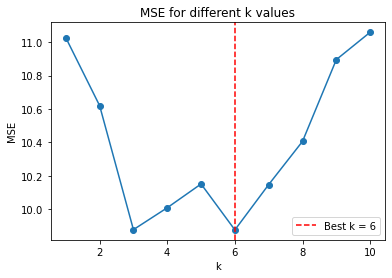

In [26]:
import matplotlib.pyplot as plt

# Plot the MSE values for each k value
plt.plot(list(mse_dict.keys()), list(mse_dict.values()),marker='o',)

# Add axis labels and a title to the plot
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE for different k values')

# Add a vertical line to indicate the best k value
plt.axvline(x=best_k, linestyle='--', color='red', label='Best k = {}'.format(best_k))

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [27]:
# Train a KNN model using the best k value
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the validation set
y_pred = best_knn.predict(X_valid_scaled)

# Compute the MSE of the predictions on the validation set
r2 = best_knn.score(X_valid_scaled, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
# Print the MSE score of the predictions on the validation set

print("R2 score on the validation set:", r2)
print("MSE score on the validation set:", mse)
print("RMSE score on the validation set:", rmse)


R2 score on the validation set: 1.0
MSE score on the validation set: 9.87452861952862
RMSE score on the validation set: 3.142376269565537


The R2 score here shows that the model performs very well on the validation set with a k value of 6 

# Naive Bayes

### **Problem 4**##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [139]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [140]:
# Import the dataset
import pandas as pd
# from google.colab import files
# file = files.upload()
df = pd.read_csv("IMDB Dataset_subset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [141]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [142]:
X = [row for row in df['review']] #list of reviews
classes = df['sentiment'] #list of true classes

In [143]:
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.

The code is carrying out preprocessing of text data stored in the variable X using several techniques. 

These include removing non-alphabetic characters, numbers, and punctuation, converting all characters to lowercase, splitting the text into words, lemmatizing each word to its base form, and joining the lemmatized words into a single string. The processed reviews are then saved in the reviews list. This type of preprocessing is commonly done to prepare text data for use in machine learning models designed for text analysis, such as sentiment analysis or text classification.






In [144]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

"texts" is a matrix that shows the frequency of words used in preprocessed reviews, where each row represents a review and each column represents a word in the vocabulary. The CountVectorizer method converts the preprocessed reviews into a bag-of-words representation, where each unique word is represented by an index. 

"vocab" is a list of words in the vocabulary sorted by their corresponding index in "texts". "texts" and "vocab" are related as "texts" is a matrix representation of the reviews using the words in "vocab". Essentially, the text data is transformed into a numerical representation that can be used as input to machine learning models.





**TODO 3**

Partition the data into 80% training and 20% validation set.

In [155]:
y=pd.get_dummies(df.iloc[:,-1:], drop_first=True)

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(pd.DataFrame(texts), y, test_size=0.2)


**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [162]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

train_preds = nb_classifier.predict(X_train)

train_acc = accuracy_score(y_train, train_preds)
train_prec = precision_score(y_train, train_preds, average='weighted')
train_rec = recall_score(y_train, train_preds, average='weighted')
train_f1 = f1_score(y_train, train_preds, average='weighted')

print("*****Evaluation on Training Data******")
print("Evaluation Report\n", classification_report(y_train, train_preds))
print("Accuracy:", train_acc)
print("Precision:", train_prec)
print("Recall:", train_rec)
print("F1-score:", train_f1)


*****Evaluation on Training Data******
Evaluation Report
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1623
           1       0.94      0.91      0.92      1577

    accuracy                           0.92      3200
   macro avg       0.93      0.92      0.92      3200
weighted avg       0.93      0.92      0.92      3200

Accuracy: 0.9246875
Precision: 0.9250227987652146
Recall: 0.9246875
F1-score: 0.9246553252718043


In [174]:
val_preds = nb_classifier.predict(X_valid)

val_acc = accuracy_score(y_valid, val_preds)
val_prec = precision_score(y_valid, val_preds, average='weighted')
val_rec = recall_score(y_valid, val_preds, average='weighted')
val_f1 = f1_score(y_valid, val_preds, average='weighted')
print("*****Evaluation on Validation Data******")
print("Evaluation Report\n", classification_report(y_valid, val_preds))
print("Accuracy:", val_acc)
print("Precision:", val_prec)
print("Recall:", val_rec)
print("F1-score:", val_f1)

*****Evaluation on Validation Data******
Evaluation Report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       404
           1       0.85      0.81      0.83       396

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

Accuracy: 0.83625
Precision: 0.8370941176470589
Recall: 0.83625
F1-score: 0.836093976616147


**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

The model's performance on both the training and validation sets is commendable, with high accuracy and F1-score values. However, there is a minor decrease in performance on the validation set, implying that the model may be somewhat overfitting to the training data. While an 83.6% accuracy on the validation set is decent, the performance could be improved by experimenting with different classification algorithms or tuning the model's hyperparameters.

**If you are interested (this part is not graded):**

Explore one or two records that were misclassified. Check the original text, vectorized text, and comment on the possible reason why the record got misclassified.